In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('Ej/ex3.png')
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
t,ret = watershed(img.copy())
hola = cv2.pyrDown(img)
t1,ret = watershed(cv2.pyrUp(hola.copy()))
hola1 = cv2.pyrDown(hola)
t2,ret  = watershed(cv2.pyrUp(cv2.pyrUp(hola1.copy())))
hola2 = cv2.pyrDown(hola1)
t3,ret = watershed(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(hola2.copy()))))
hola3 = cv2.pyrDown(hola2)
t4,ret = watershed(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(hola3.copy())))))
hola4 = cv2.pyrDown(hola3)
t5,ret = watershed(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(hola4.copy()))))))
hola5 = cv2.pyrDown(hola4)
t6,ret = watershed(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(hola5.copy())))))))
hola6 = cv2.pyrDown(hola5)
t7,ret = watershed(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(hola6.copy()))))))))
hola7 = cv2.pyrDown(hola6)
t8,ret = watershed(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(cv2.pyrUp(hola7.copy())))))))))

plt.figure(1,figsize=(15,5))
plt.suptitle("Imagenes")
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(hola, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(hola1, cmap=plt.cm.gray), plt.title('Original')
plt.show()
plt.figure(2,figsize=(15,5))
plt.suptitle("Imagenes")
plt.subplot(131), plt.imshow(hola2, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(hola3, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(hola4, cmap=plt.cm.gray), plt.title('Original')
plt.show()
plt.figure(3,figsize=(15,5))
plt.suptitle("Imagenes")
plt.subplot(131), plt.imshow(hola5, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(hola6, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(hola7, cmap=plt.cm.gray), plt.title('Original')
plt.show()

plt.figure(4,figsize=(15,5))
plt.suptitle("Imagenes")
plt.subplot(131), plt.imshow(t, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(t1, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(t2, cmap=plt.cm.gray), plt.title('Original')
plt.show()
plt.figure(5,figsize=(15,5))
plt.suptitle("Imagenes")
plt.subplot(131), plt.imshow(t3, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(t4, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(t5, cmap=plt.cm.gray), plt.title('Original')
plt.show()
plt.figure(6,figsize=(15,5))
plt.suptitle("Imagenes")
plt.subplot(131), plt.imshow(t6, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(t7, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(t8, cmap=plt.cm.gray), plt.title('Original')
plt.show()

NameError: name 'watershed' is not defined

In [ ]:
def watershed (img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)



    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0

    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,0,0]
    return markers,thresh

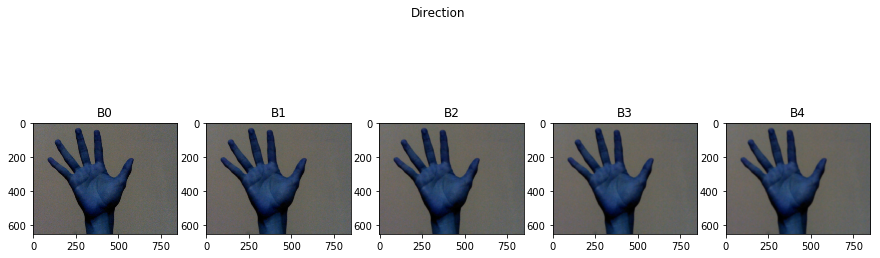

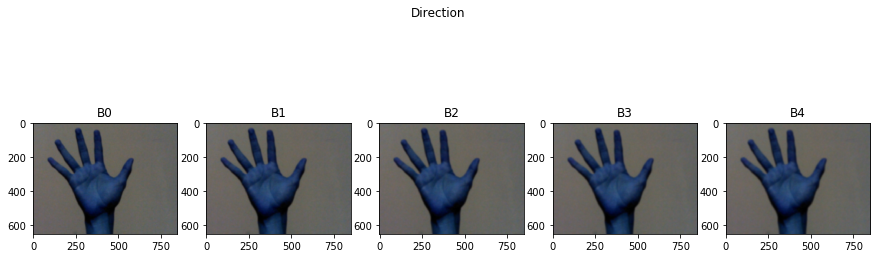

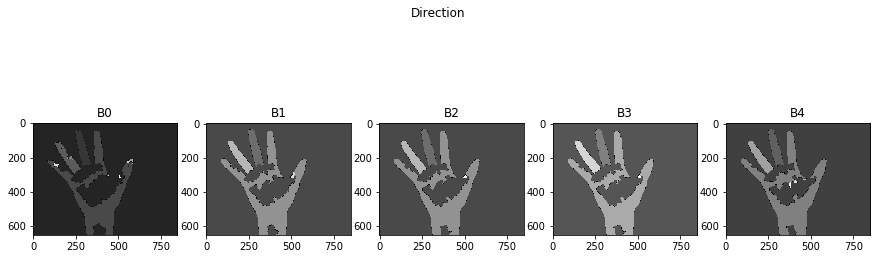

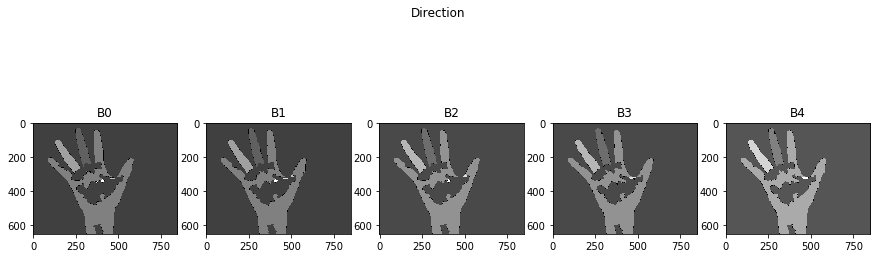

In [133]:
img = cv2.imread('Ej/ex1.jpg')
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

images=[]
treshs=[]
t,ret = watershed(img.copy())
treshs.append(t)
images.append( cv2.pyrUp(cv2.pyrDown(img)))
#images.append( cv2.pyrDown(img))
for i in range(10):
    t,ret = watershed(images[i].copy())
    #t,ret = watershed(cv2.pyrUp(images[i].copy()))
    treshs.append(t)
    images.append( cv2.pyrUp(cv2.pyrDown(images[i])))
    #images.append( cv2.pyrDown(images[i]))
    
plt.figure(2,figsize=(15,5))
plt.suptitle("Direction")
for i in range(5):
    plt.subplot(151+i), plt.imshow(images[i], cmap=plt.cm.gray), plt.title('B'+str(i))
plt.figure(3,figsize=(15,5))
plt.suptitle("Direction")
for i in range(5):
    plt.subplot(151+i), plt.imshow(images[i+5], cmap=plt.cm.gray), plt.title('B'+str(i))
plt.show()

plt.figure(4,figsize=(15,5))
plt.suptitle("Direction")
for i in range(5):
    plt.subplot(151+i), plt.imshow(treshs[i], cmap=plt.cm.gray), plt.title('B'+str(i))
plt.figure(5,figsize=(15,5))
plt.suptitle("Direction")
for i in range(5):
    plt.subplot(151+i), plt.imshow(treshs[i+5], cmap=plt.cm.gray), plt.title('B'+str(i))
plt.show()

In [ ]:
img = cv2.imread('Ej/example1.jpg',0)
h,w =img.shape
#print img.shape
des=np.zeros((h/2,w/2))
#prim w despues h
des1=[[[]]*(w/2)]*(h/2)
des2=np.zeros((h/2,w/2))

#des1=[[[[]*2]]*(w/2)]*(h/2)
#des1[0][0].append([1,2])
#des1[0][0].append([1,2])
#print des1[0][0]
#print des.shape
#print np.uint16(img[0,0]),np.uint16(img[1,0]),np.uint16(img[0,1]),np.uint16(img[1,1])
#print 7/2
for i in range(h/2):
    for j in range (w/2):
        des[i,j]=(np.uint16(img[2*i,2*j])+np.uint16(img[2*i+1,2*j])+np.uint16(img[2*i,2*j+1])+np.uint16(img[2*i+1,2*j+1]))/4
        
#print des[0,0]
for i in range(h):
    for j in range (w):
        
        p=[i/2,j/2]
        posParents=[]
        posParents=[p,[p[0]+1,p[1]+1],[p[0],p[1]+1],[p[0]+1,p[1]],[p[0]-1, p[1]+1],[p[0]+1,p[1]-1],[p[0],p[1]-1],[p[0]-1,p[1]],[p[0],p[1]-1],[p[0]-1,p[1]-1]]
        dist=256
        current=[-1,-1]
        for k in range(9):
            if(posParents[k][0]>=0 and posParents[k][1]>=0 and posParents[k][0]<(h/2) and posParents[k][1]<(w/2)):
                value=abs(img[i,j]-des[posParents[k][0],posParents[k][1]])
                #print  img[i,j],des[posParents[k][0],posParents[k][1]]
                if value<dist:
                    dist=value
                    currentP=posParents[k]
                    
        des1[posParents[k][0]][posParents[k][1]].append([i,j])
            
for i in range(h/2):
    for j in range (w/2):
        prom=0
        quan=len(des1[i][j])
        for k in range(len(des1[i][j])):
            prom+=np.uint16(img[des1[i][j][k][0],des1[i][j][k][1]])
        des2[i,j]=prom/quan
            
        
        
        
        #des[i,j]=(np.uint16(img[2*i,2*j])+np.uint16(img[2*i+1,2*j])+np.uint16(img[2*i,2*j+1])+np.uint16(img[2*i+1,2*j+1]))/4
plt.figure(2,figsize=(15,5))
plt.suptitle("Imagenes")
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(des, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(des2, cmap=plt.cm.gray), plt.title('Original')
plt.show()


2800.0
1600.0


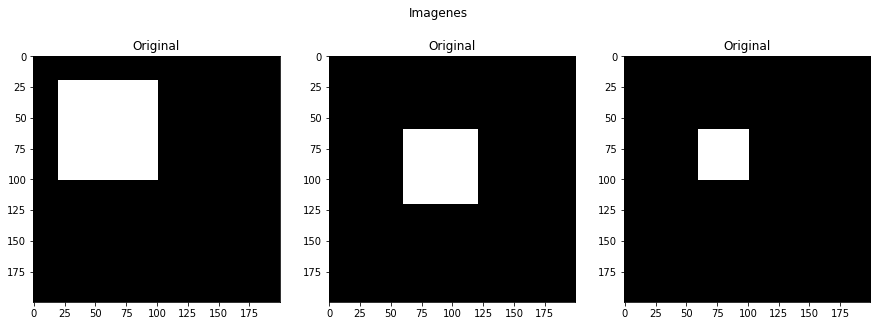

In [25]:
img=np.zeros((200,200))
img1=np.zeros((200,200))
rect1=cv2.rectangle(img,(20,20),(100,100),color=[255,0,0],thickness=-1)
im2,contours,hierarchy = cv2.findContours(np.uint8(img), 1, 2)
cnt = contours[0]
area= cv2.contourArea(cnt)
rect2=cv2.rectangle(img1,(60,60),(120,120),color=[255,0,0],thickness=-1)
im2,contours,hierarchy = cv2.findContours(np.uint8(img1), 1, 2)
cnt = contours[0]
area1= cv2.contourArea(cnt)
print abs(area-area1)
img2=cv2.bitwise_and(img,img1)
im2,contours,hierarchy = cv2.findContours(np.uint8(img2), 1, 2)
cnt = contours[0]
print cv2.contourArea(cnt)

#rect4=cv2.rectangle(rec=rect3)
plt.figure(2,figsize=(15,5))
plt.suptitle("Imagenes")
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(img1, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(img2, cmap=plt.cm.gray), plt.title('Original')
plt.show()


[[[  0 255 255]]]


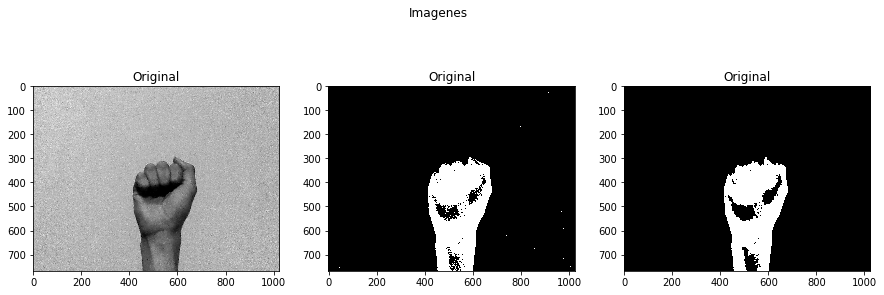

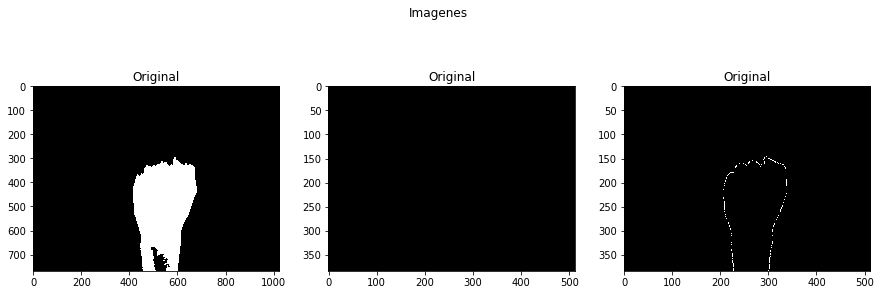

In [38]:
img = cv2.imread('Ej/ex2.jpg',0)
img5 = cv2.imread('Ej/contour.jpg')
img1=np.zeros((img.shape))
img2=np.zeros((img5.shape))
red = np.uint8([[[0,0,255 ]]])
hsv = cv2.cvtColor(img5, cv2.COLOR_BGR2HSV)

hsv_red = cv2.cvtColor(red,cv2.COLOR_BGR2HSV)
lower_r = np.array([0,150,150])
upper_r = np.array([10,255,255])
print hsv_red
mask = cv2.inRange(hsv, lower_r, upper_r)

im3,contours1,hierarchy = cv2.findContours(mask, 1, 2)



for i in range(len(contours1)):
    cv2.drawContours(img2,contours1,i,color=[255,0,0],thickness=-1)

# Proyecto Julian
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

im2,contours,hierarchy = cv2.findContours(opening, 1, 2)

cnt = contours[0]

for i in range(len(contours)):
    cv2.drawContours(img1,contours,i,color=[255,0,0],thickness=-1)
plt.figure(2,figsize=(15,5))
plt.suptitle("Imagenes")
plt.subplot(131), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(thresh, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(opening, cmap=plt.cm.gray), plt.title('Original')
plt.show()
plt.figure(2,figsize=(15,5))
plt.suptitle("Imagenes")
plt.subplot(131), plt.imshow(img1, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(132), plt.imshow(img2, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(133), plt.imshow(mask, cmap=plt.cm.gray), plt.title('Original')
plt.show()